In [1]:
import torch
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.models import ResNet50_Weights
import numpy as np
import torchvision.transforms as transforms        
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter,raps_imagenet_real_scatter, saps_imagenet_real_scatter

#  Reprocess
data_transform = transforms.Compose([
    transforms.CenterCrop(256),
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# load pre-trained model 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1).to(device)

# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=2)
model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.1

Before temperature - NLL: 1.192, ECE: 0.025
Optimal temperature: 0.993
After temperature - NLL: 1.192, ECE: 0.024


APS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9206 ± 0.0026
Final Average Prediction Set Size: 15.60 ± 0.49
Final Average Coverage: 0.8992 ± 0.0040
Final Average Real Probability: 0.7955 ± 0.0052


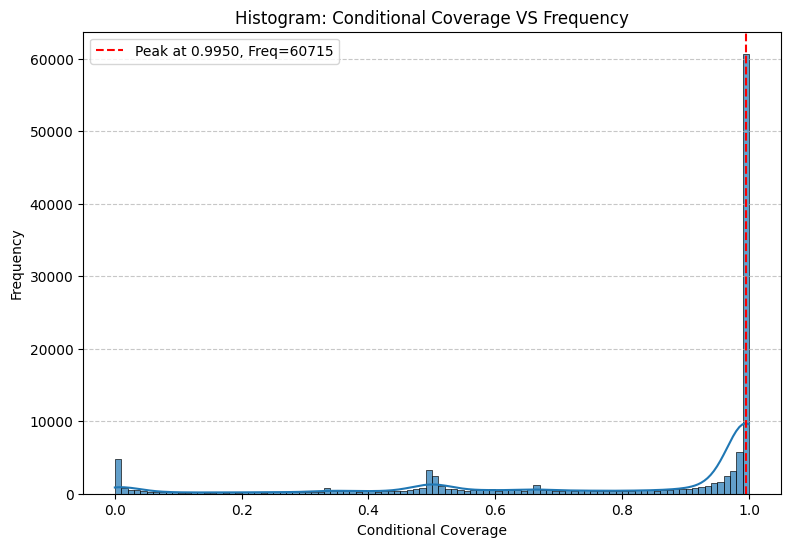

60715 (48.82%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9848 ± 0.0022
Final Average Prediction Set Size: 3.21 ± 0.05
Final Average Coverage: 0.9002 ± 0.0031
Final Average Real Probability: 0.7505 ± 0.0051


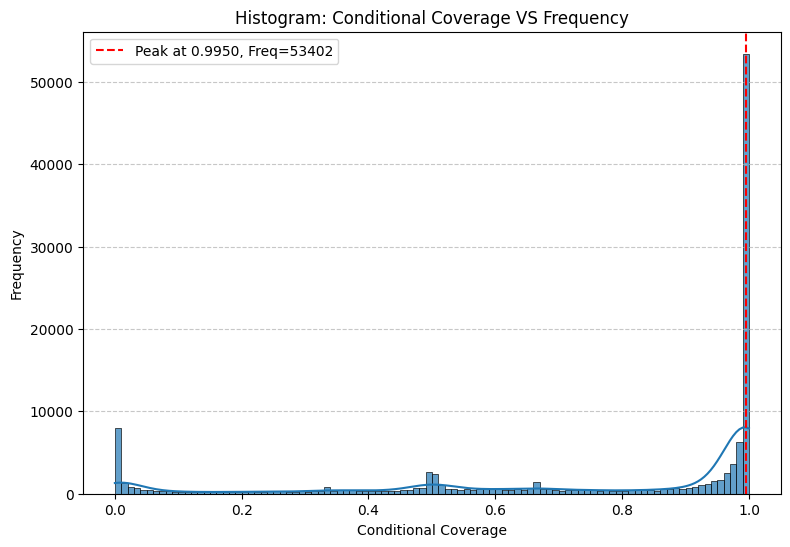

53402 (42.94%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.1, k_reg=4, num_runs=10, alpha=0.1, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0677 ± 0.0096
Final Average Prediction Set Size: 3.08 ± 0.06
Final Average Coverage: 0.9002 ± 0.0029
Final Average Real Probability: 0.7431 ± 0.0054


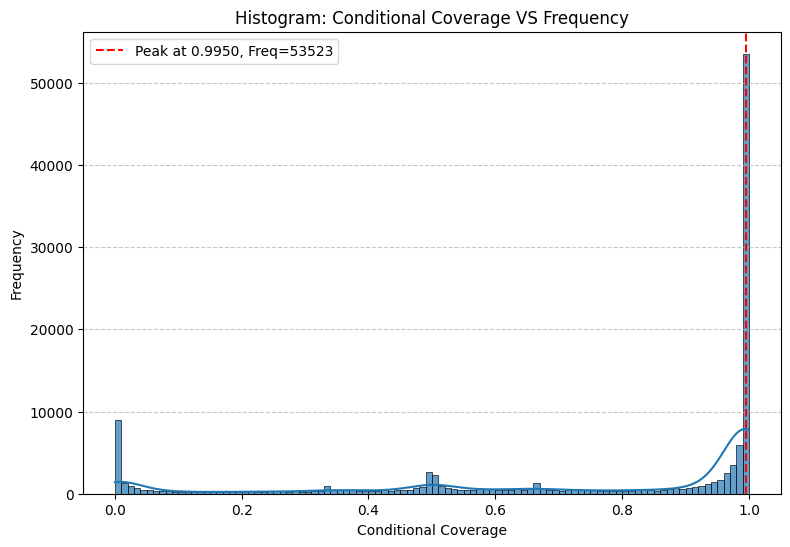

53523 (43.04%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.15, num_runs=10, alpha=0.1, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9206 ± 0.0026
Final Average Prediction Set Size: 15.60 ± 0.49
Final Average Coverage: 0.8992 ± 0.0040
Final Average Real Probability: 0.7955 ± 0.0052


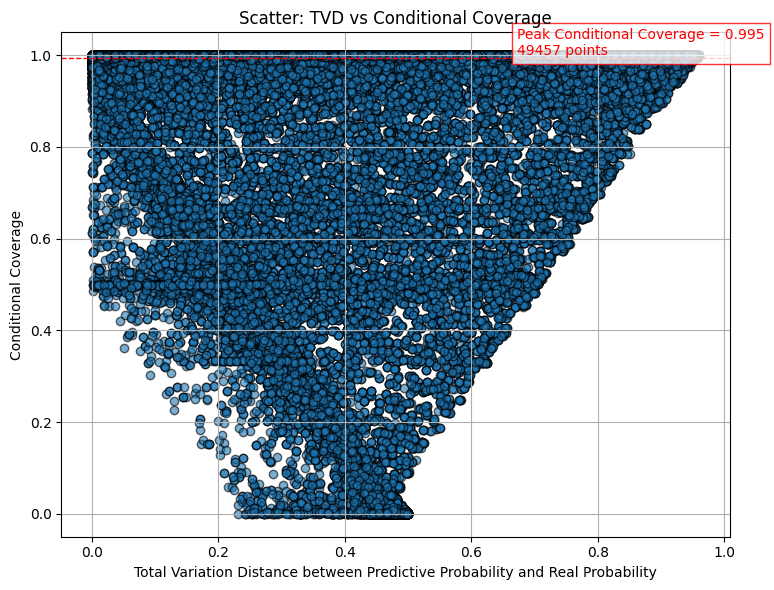

Peak Conditional Coverage = 0.995, with 49457 samples

=== Count Regions Summary ===
41890 (33.7%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
31865 (25.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
33896 (27.3%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.99997']
  Real Probability Set      : ['0.99889']
Sample 2:
  Predictive Probability Set: ['0.92805']
  Real Probability Set      : ['0.92361']
Sample 3:
  Predictive Probability Set: ['0.87237', '0.04937']
  Real Probability Set      : ['0.76421', '0.07850']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.61692', '0.26406', '0.02788']
  Real Probability Set      : ['0.00141', '0.00141', '0.00141']
Sample 2:
  Predictive Probability Set: ['0.89232', '0.01902']
  Real Probability Set      : ['0.00877', '0.10334']
Sample 3:
  Predictive Probability Set: ['0.637

In [5]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9848 ± 0.0022
Final Average Prediction Set Size: 3.21 ± 0.05
Final Average Coverage: 0.9002 ± 0.0031
Final Average Real Probability: 0.7505 ± 0.0051


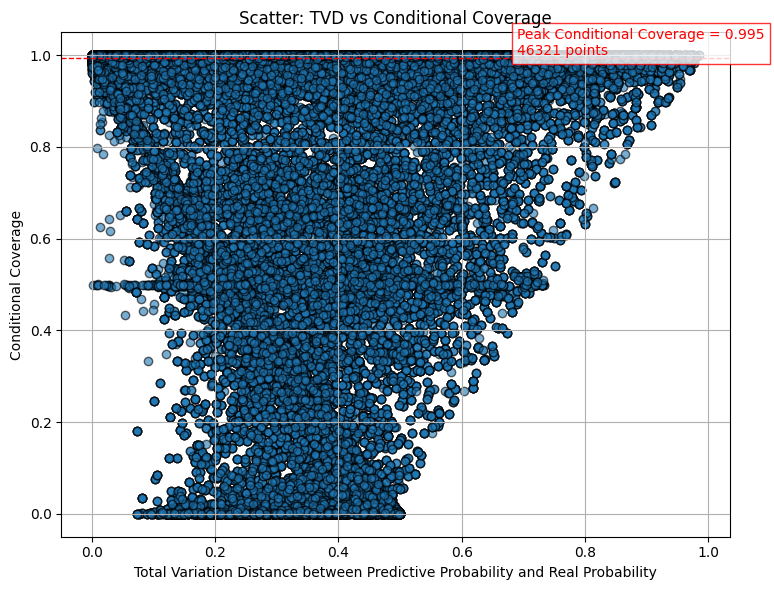

Peak Conditional Coverage = 0.995, with 46321 samples

=== Count Regions Summary ===
48737 (39.2%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
23431 (18.8%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
41827 (33.6%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.96895', '0.01250', '0.00622']
  Real Probability Set      : ['0.99785', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.99584']
  Real Probability Set      : ['0.99698']
Sample 3:
  Predictive Probability Set: ['0.85581', '0.05332', '0.01777', '0.01019']
  Real Probability Set      : ['0.95820', '0.00094', '0.01317', '0.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.36544', '0.34678', '0.14100', '0.04142']
  Real Probability Set      : ['0.00700', '0.00000', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.36827', '

In [6]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.1, k_reg=4, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0677 ± 0.0096
Final Average Prediction Set Size: 3.08 ± 0.06
Final Average Coverage: 0.9002 ± 0.0029
Final Average Real Probability: 0.7431 ± 0.0054


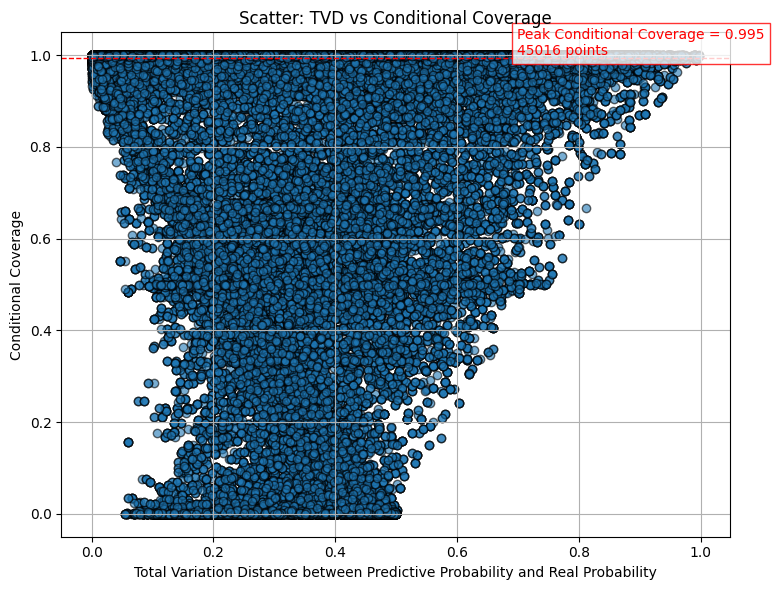

Peak Conditional Coverage = 0.995, with 45016 samples

=== Count Regions Summary ===
47860 (38.5%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
22548 (18.1%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
42872 (34.5%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.47855', '0.41712', '0.08123', '0.00329', '0.00199']
  Real Probability Set      : ['0.46731', '0.46620', '0.06633', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.88340', '0.02974']
  Real Probability Set      : ['0.99621', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.88340', '0.02974']
  Real Probability Set      : ['0.99621', '0.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.19328', '0.16732', '0.09572', '0.02554', '0.01931', '0.01743']
  Real Probability Set      : ['0.00085', '0.00085', '0.00092', '0.00000', '0.00092'

In [7]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.15, num_runs=10, alpha=0.1)